In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

# Pre-Processing

In [17]:
#importing the excel  file
filename = "Lab5_Group16_NACA0012.csv"
raw_data = pd.read_csv(filename)

#breaking the data into each test (10 tests, 21 points per test)
SideForce_values = np.zeros((10,21))
PitchingMoment_values = np.zeros((10,21))
NormalForce_values = np.zeros((10,21))
YawingMoment_values = np.zeros((10,21))
RollingMoment_values = np.zeros((10,21))
AxialForce_values = np.zeros((10,21))
DynamicPressure_values = np.zeros((10,21))
StaticPressure_values = np.zeros((10,21))
AirSpeed_values = np.zeros((10,21))

i = -1
while i < 9:
    i = i + 1
    SideForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 1]
    PitchingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 2]
    NormalForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 3]
    YawingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 4]
    RollingMoment_values[i,:] = raw_data.iloc[i*21:i*21+21, 5]
    AxialForce_values[i,:] = raw_data.iloc[i*21:i*21+21, 6]
    DynamicPressure_values[i,:] = raw_data.iloc[i*21:i*21+21, 7]
    StaticPressure_values[i,:] = raw_data.iloc[i*21:i*21+21, 8]
    AirSpeed_values[i,:] = raw_data.iloc[i*21:i*21+21, 9]

#taking the average of the recorded data for each case
SideForce = []
PitchingMoment = []
NormalForce = []
YawingMoment = []
RollingMoment = []
AxialForce = []
DynamicPressure = []
StaticPressure = []
AirSpeed = []

for i in range(len(SideForce_values)):
    SideForce.append(np.mean(SideForce_values[i]))
    PitchingMoment.append(np.mean(PitchingMoment_values[i]))
    NormalForce.append(np.mean(NormalForce_values[i]))
    YawingMoment.append(np.mean(YawingMoment_values[i]))
    RollingMoment.append(np.mean(RollingMoment_values[i]))
    AxialForce.append(np.mean(AxialForce_values[i]))
    DynamicPressure.append(np.mean(DynamicPressure_values[i]))
    StaticPressure.append(np.mean(StaticPressure_values[i]))
    AirSpeed.append(np.mean(AirSpeed_values[i]))

#adjusting the signs according to the force balance to match the directions specified
for i in range(len(SideForce)):
    SideForce[i] = SideForce[i]*-1
    NormalForce[i] = NormalForce[i]*-1
    PitchingMoment[i] = PitchingMoment[i]*-1

#calculating the densities for each case (rho = p/(R_spec*T))
R_spec = 53.35 #ft*lbf/lb*R
rho = []

TestNotes = pd.read_excel("Test Notes.xlsx")
Temperature = TestNotes.iloc[:,1]+459.67 #converting to Rankine

for i in range(len(StaticPressure)):
    rho_v = (2083.5938+(StaticPressure[i]*144))/(R_spec*Temperature.loc[i]) #lbm/ft^3
    rho.append(rho_v)

# Parasitic Drag

          Re_Mac        Re_Fus  Axial Force (lbf)  Normal Force (lbf)  \
0   99223.066305  2.505382e+05           0.024191           -0.031667   
1  197941.915721  4.998033e+05           0.079082           -0.065353   
2  295467.571566  7.460556e+05           0.167080           -0.115066   
3  393035.636370  9.924150e+05           0.284813           -0.216700   
4  488656.344681  1.233857e+06           0.438222           -0.312113   

   Side Force (lbf)      C_D0       C_L       C_Y  
0          0.016496  0.018913 -0.026260  0.013679  
1          0.038894  0.015249 -0.013367  0.007955  
2          0.075155  0.014567 -0.010641  0.006950  
3          0.176226  0.014143 -0.011414  0.009282  
4          0.272402  0.013872 -0.010480  0.009147  
[0.02419095238095238, 0.07908176190476189, 0.1670804761904762, 0.2848132857142857, 0.43822219047619043, -0.022383, -0.2585398571428571, -0.5684196190476192, -0.8872876190476189, -0.08705819047619048]
[0.019985809523809524, 0.08103133333333334, 0.179

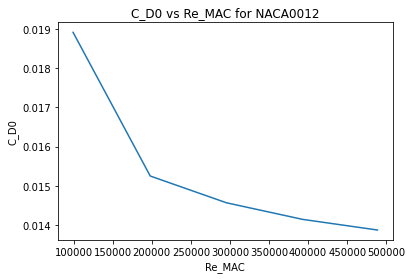

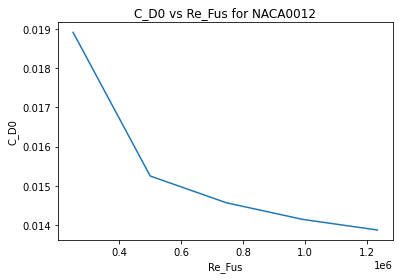

In [23]:
#Calculating the Reynolds Number
#constants
mu = 0.3841E-6*32.174 #lbm/ft*s
MAC = 4/12 #ft
Fus = 10.1/12 #ft
S_ref = 64 #wing surface area (both wings)

#value lists
Re_Mac_vals = []
Re_Fus_vals = []
CD_0_vals = []
C_L_vals = []
C_Y_vals = []

for i in range(5): #Re for the first 5 cases (0 AoA)
    Re_MAC = (rho[i]*AirSpeed[i]*MAC)/mu
    Re_FUS = (rho[i]*AirSpeed[i]*Fus)/mu

    Re_Mac_vals.append(Re_MAC)
    Re_Fus_vals.append(Re_FUS)

# #Calculating the parasitic drag coefficient
# for i in range(5):
#     D = AxialForce[i]*np.cos(0) + NormalForce[i]*np.sin(0)
#     CD_0 = D/(DynamicPressure[i]*S_ref)
#     CD_0_vals.append(CD_0)

#Calculating CL and CY with respect to aircraft body
r_body = 1.75/2 #in
h_body = 10.1 #in
S_body_ref = 2*np.pi*r_body*h_body + 2*np.pi*r_body**2 #in^2

for i in range(5):
    L = NormalForce[i]*np.cos(0) - AxialForce[i]*np.sin(0)
    C_L = L/(DynamicPressure[i]*S_body_ref)
    C_L_vals.append(C_L)

    Y = SideForce[i]
    C_Y = Y/(DynamicPressure[i]*S_body_ref)
    C_Y_vals.append(C_Y)

#Calculating the parasitic drag coefficient
for i in range(5):
    D = AxialForce[i]*np.cos(0) + NormalForce[i]*np.sin(0)
    CD_0 = D/(DynamicPressure[i]*S_ref)
    CD_0_vals.append(CD_0)

d = {'Re_Mac': Re_Mac_vals,'Re_Fus': Re_Fus_vals, 'Axial Force (lbf)': AxialForce[0:5], 'Normal Force (lbf)': NormalForce[0:5], 'Side Force (lbf)': SideForce[0:5], 'C_D0': CD_0_vals, 'C_L': C_L_vals, 'C_Y': C_Y_vals}
Q2_df = pd.DataFrame(data=d)
print(Q2_df)

print(AxialForce)
print(DynamicPressure)

plt.plot(Re_Mac_vals, CD_0_vals)
plt.xlabel("Re_MAC")
plt.ylabel("C_D0")
plt.title("C_D0 vs Re_MAC for NACA0012")
plt.show()

plt.plot(Re_Fus_vals, CD_0_vals)
plt.xlabel("Re_Fus")
plt.ylabel("C_D0")
plt.title("C_D0 vs Re_Fus for NACA0012")
plt.show()




# Lift, Drag and Pitching Moment

In [33]:
#Calculating the C_L and C_D for each AoA
AoA = TestNotes.iloc[5:11, 3]*(np.pi/180) #AoA in radians
C_L_AoA = [C_L_vals[2]]
C_D_AoA = [CD_0_vals[2]]
C_M_AoA = [PitchingMoment[2]/(DynamicPressure[2]*S_ref*MAC*12)]
AoA_val = [0]
AF_val = [AxialForce[2]]
NF_val = [NormalForce[2]]
PM_val = [PitchingMoment[2]]

for i in range(len(AoA)):
    L = NormalForce[i+5]*np.cos(AoA.iloc[i]) - AxialForce[i+5]*np.sin(AoA.iloc[i])
    C_L = L/(DynamicPressure[i+5]*(S_ref))
    C_L_AoA.append(C_L)

    D = AxialForce[i]*np.cos(AoA.iloc[i]) + NormalForce[i]*np.sin(AoA.iloc[i])
    C_D = D/(DynamicPressure[i+5]*(S_ref))
    C_D_AoA.append(C_D)

    C_M = PitchingMoment[i+5]/(DynamicPressure[i+5]*S_ref*MAC*12)
    C_M_AoA.append(C_M)

    AoA_val.append(AoA.iloc[i])
    AF_val.append(AxialForce[i+5])
    NF_val.append(NormalForce[i+5])
    PM_val.append(PitchingMoment[i+5])

print(len(AoA))
print(len(AxialForce[5:]))
print(len(NormalForce[5:]))
print(len(PitchingMoment[5:]))
print(len(C_L_AoA))
print(len(C_D_AoA))
print(len(C_M_AoA))


d = {'AoA (rad)': AoA_val, 'Axial Force (lbf)': AF_val, 'Normal Force (lbf)': NF_val, 'Pitching Moment (lbf-in)': PM_val, 'C_L': C_L_AoA, 'C_D': C_D_AoA, 'C_m': C_M_AoA}
Q3b_df = pd.DataFrame(data=d)
print(Q3b_df)

    

5
5
5
5
6
6
6
   AoA (rad)  Axial Force (lbf)  Normal Force (lbf)  Pitching Moment (lbf-in)  \
0   0.000000           0.167080           -0.115066                 -0.226345   
1   0.074176          -0.022383            2.271445                  1.031557   
2   0.106465          -0.258540            3.523437                  1.406689   
3   0.143117          -0.568420            4.560705                  1.986159   
4   0.177151          -0.887288            5.428857                  2.580171   
5   0.205076          -0.087058            5.230694                  0.379914   

        C_L       C_D       C_m  
0 -0.010641  0.014567 -0.004933  
1  0.200169  0.001923  0.022772  
2  0.310565  0.006305  0.030931  
3  0.403339  0.013075  0.043584  
4  0.474278  0.020882  0.055621  
5  0.452583  0.032188  0.008365  
